In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
data = np.loadtxt("../../data/ex2data1.txt", delimiter=",")

In [15]:
df = pd.DataFrame(data)
df.columns

RangeIndex(start=0, stop=3, step=1)

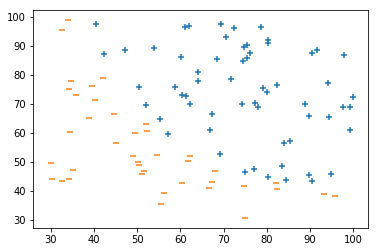

In [29]:
positive = df.loc[df[2] == 1]
nagetive = df.loc[df[2] == 0]
plt.scatter(positive[0], positive[1], marker="+")
plt.scatter(nagetive[0], nagetive[1], marker="_")
plt.show()

In [57]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.ones([2,1]))
b = tf.Variable(tf.ones([1,1]))
prob = tf.sigmoid(tf.matmul(X,W)+b)

In [56]:
init = tf.global_variables_initializer()
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    print sess.run(prob, {X: df.iloc[:, :2]})

[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
